# EX 8

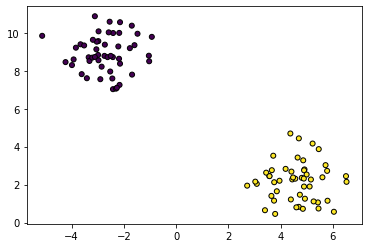

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

In [7]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [8]:
from sklearn.preprocessing import StandardScaler

In [11]:
X = StandardScaler().fit_transform(X)

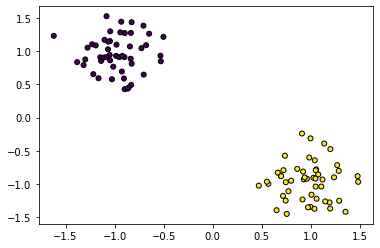

In [12]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

In [13]:
lin_svc = LinearSVC(loss='hinge')
lin_svc.fit(X, y)

LinearSVC(loss='hinge')

In [33]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, color='k'):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 50)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # margin = 1/w[1]
    # gutter_up = decision_boundary + margin
    # gutter_down = decision_boundary - margin

    # svs = svm_clf.support_vectors_
    # plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, f"{color}-", linewidth=2)
    # plt.plot(x0, gutter_up, "k--", linewidth=2)
    # plt.plot(x0, gutter_down, "k--", linewidth=2)

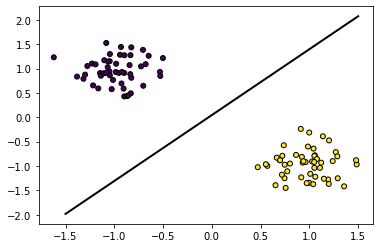

In [36]:
import numpy as np

plot_svc_decision_boundary(lin_svc, -1.5, 1.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

In [22]:
model_svc = SVC(kernel='linear')
model_svc.fit(X, y)

SVC(kernel='linear')

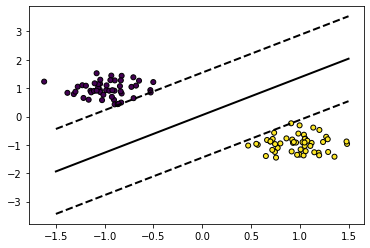

In [23]:
plot_svc_decision_boundary(model_svc, -1.5, 1.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

In [30]:
model_sgdc = SGDClassifier(alpha=0.5)
model_sgdc.fit(X, y)

SGDClassifier(alpha=0.5)

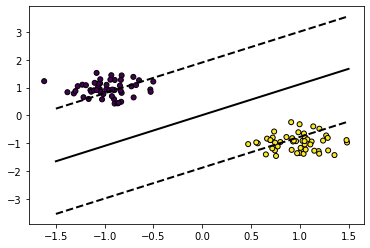

In [31]:
plot_svc_decision_boundary(model_sgdc, -1.5, 1.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

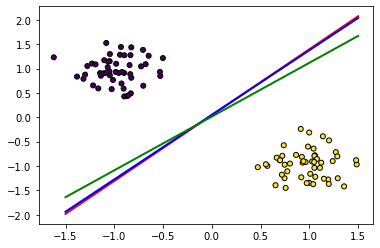

In [38]:
plot_svc_decision_boundary(lin_svc, -1.5, 1.5, 'r')
plot_svc_decision_boundary(model_svc, -1.5, 1.5, 'b')
plot_svc_decision_boundary(model_sgdc, -1.5, 1.5, 'g')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k');

# EX 9

In [85]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

In [86]:
digits_X = digits['images']
digits_y = digits['target']

In [87]:
digits_X[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

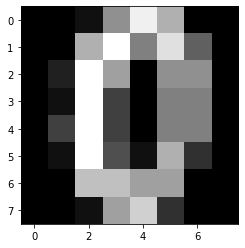

In [88]:
plt.imshow(digits_X[10], cmap='gray')

In [89]:
digits_X.shape

(1797, 8, 8)

In [90]:
digits_y.shape

(1797,)

In [91]:
n_samples = len(digits_X)
data = digits_X.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = SVC(random_state=42)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits_y, test_size=0.3, shuffle=False, random_state=42)

In [76]:
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [77]:
pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.9537037037037037

In [78]:
clf_lin = LinearSVC(loss = 'hinge', random_state=42)
clf_lin.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(loss='hinge', random_state=42)

In [79]:
pred_lin = clf_lin.predict(X_test)
metrics.accuracy_score(y_test, pred_lin)

0.8777777777777778

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
clf_lin.fit(X_train_scaled, y_train)
pred_lin_sc = clf_lin.predict(X_test_scaled)
metrics.accuracy_score(y_test, pred_lin_sc)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8907407407407407

In [82]:
classifier.fit(X_train_scaled, y_train)
pred = classifier.predict(X_test_scaled)
metrics.accuracy_score(y_test, pred)

0.9425925925925925

In [83]:
model_sgdc = SGDClassifier(alpha=0.5)
model_sgdc.fit(X_train_scaled, y_train)
pred_sgdc = model_sgdc.predict(X_test_scaled)
metrics.accuracy_score(y_test, pred_sgdc)

0.8796296296296297

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
from scipy.stats import reciprocal, uniform

param = {
    'gamma': reciprocal(0.001, 0.1),
    'C': uniform(1, 10)
}

clf = RandomizedSearchCV(classifier, param, random_state=42, cv=3, n_iter=10)
clf.fit(X_train_scaled, y_train)
clf.best_params_

{'C': 4.042422429595377, 'gamma': 0.011207606211860567}

In [99]:
y_pred_b = clf.best_estimator_.predict(X_test_scaled)
metrics.accuracy_score(y_test, y_pred_b)

0.9462962962962963

# EX 10

In [101]:
X, y = datasets.fetch_california_housing(return_X_y=True)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
from sklearn.svm import SVR

svm_reg = SVR()

In [113]:
svm_reg.fit(X_train_scaled, y_train)

SVR()

In [114]:
y_pred = svm_reg.predict(X_train_scaled)
metrics.mean_squared_error(y_train, y_pred)

0.3446826118587169

In [115]:
y_pred = svm_reg.predict(X_test_scaled)
metrics.mean_squared_error(y_test, y_pred)

0.34955193341649854

In [116]:
from scipy.stats import reciprocal, uniform

param = {
    'gamma': reciprocal(0.001, 0.1),
    'C': uniform(1, 10)
}

clf_rs = RandomizedSearchCV(svm_reg, param, random_state=42, cv=3, n_iter=10)
clf_rs.fit(X_train_scaled, y_train)
clf_rs.best_params_

{'C': 4.745401188473625, 'gamma': 0.07969454818643928}

In [118]:
y_pred_b = clf_rs.best_estimator_.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred_b)
np.sqrt(mse)

0.5855559549600056